# Table of Contents
1. [System Of Linear Equations](#SL)
- [Definition](#D)
2. [Solving The System](#S)
- [Types of Solutions](#TypesofSolutions)
  - [One Solution Case](#OneSolutionCase)
  - [No Solution (Inconsistent System)](#NoSolution)
  - [Infinite Solutions (Dependent System)](#InfiniteSolutions)
  - [Visualization of Linear System Solutions](#Visualization)
- [Systematic Solution of Linear Systems (Row Reduction & Pivots)](#SystematicSolution)
  - [Elementary Row Operations](#ElementaryRowOperations)
  - [Row Echelon Form (REF)](#REF)
  - [Reduced Row Echelon Form (RREF)](#RREF)
  - [Pivot and Free Variables](#Pivot)
  - [Solve the system systematically](#Solve)

## system of linear equations <a name='SL'></a>
### Definition <a name='D'></a>
A **system of linear equations** is a collection of equations that share the same variables:
$$
\begin{cases}
a_1x + b_1y = c_1 \\
a_2x + b_2y = c_2
\end{cases}
$$

**Matrix form:**

$$
A\mathbf{x} = \mathbf{b}
$$

$$
A =
\begin{bmatrix}
a_1 & b_1\\
a_2 &b_2
\end{bmatrix},\quad
\mathbf{x} =
\begin{bmatrix}
x \\ y
\end{bmatrix} ,\quad
\mathbf{b} = 
\begin{bmatrix}
c_1 \\ c_2
\end{bmatrix}
$$

## Solving The System  : <a name='S'></a>

In [165]:
import numpy as np
# Define matrix A and vector b
A = np.array([[2, 1],
              [4, -6]])
b = np.array([5, -2])

print("Matrix A:\n", A)
print("Vector b:", b)

x = np.linalg.solve(A, b)
print('Solution', x)

Matrix A:
 [[ 2  1]
 [ 4 -6]]
Vector b: [ 5 -2]
Solution [1.75 1.5 ]


### Types of Solutions <a name='TypesofSolutions'></a>
####  One Solution Case <a name='OneSolutionCase'></a>

A linear system 
$( A\mathbf{x} = \mathbf{b} )$ 
has **one unique solution** when the determinant of the coefficient matrix is **nonzero**:

$$
\det(A) \neq 0
$$

This means that the matrix \( A \) is **invertible**, and the solution can be found as:

$$
\mathbf{x} = A^{-1}\mathbf{b}
$$

**Geometric interpretation:**
- In **2D**, the two lines **intersect at exactly one point**.  
- In **3D**, the three planes intersect at a **single point**.

---
**Example**

$$
\begin{cases}
x + y = 5 \\
2x + 3y = 12
\end{cases}
$$

**Matrix form:**

$$
A =
\begin{bmatrix}
1 & 1 \\
2 & 3
\end{bmatrix}, \quad
\mathbf{b} =
\begin{bmatrix}
5 \\ 12
\end{bmatrix}
$$

In [168]:
import numpy as np

A = np.array([[1,1],
              [2,3]])
b = np.array([5, 12])

det_A = np.linalg.det(A)
x = np.linalg.solve(A, b)
print("det(A) =", det_A) # Since det(A) != 0 there is exactly one solution
print("Solution:", x)

det(A) = 1.0
Solution: [3. 2.]


#### No Solution (Inconsistent System)<a name='NoSolution'></a>
Occurs when the system is **inconsistent** — the equations represent **parallel lines** that never meet.

**Example:**

$$
\begin{cases}
x + y = 2 \\
2x + 2y = 5
\end{cases}
$$

**Matrix form**
$$
A = \begin{bmatrix}
1 & 1 \\
2 & 2
\end{bmatrix},\quad 
\mathbf{b} = \begin{bmatrix} 2 \\ 5
\end{bmatrix}$$

In [171]:
import numpy as np
A  = np.array([[1, 1],
               [2, 2]])
b = np.array([2 , 5])

try :
    np.linalg.solve(A , b)
except np.linalg.LinAlgError:
    print('No solution - system is inconsistent (parallel lines)')

No solution - system is inconsistent (parallel lines)


#### Infinite Solutions (Dependent System) <a name='Infinite Solutions'></a>

Occurs when one equation is a scalar multiple of another — representing the same line.<br>
**Example:**

$$
\begin{cases}
x + 2y = 4\\
2x + 4y = 8
\end{cases}
$$
**Matrix form:**
$$
A = \begin{bmatrix}
1 & 2 \\
2 & 4
\end{bmatrix}, \quad
\mathbf{b} = \begin{bmatrix} 4 \\ 8 
\end{bmatrix}
$$

In [174]:
import numpy as np
A = np.array([[1,2],
             [2,4]])
b = np.array([4, 8])

rank_A = np.linalg.matrix_rank(A)
rank_Ab = np.linalg.matrix_rank(np.c_[A, b])

if rank_A == rank_Ab and rank_A < A.shape[1]:
    print(' Infinite solutions — dependent equations (same line).')

 Infinite solutions — dependent equations (same line).


### Visualization of Linear System Solutions<a name ='Visualization'></a>
- Left plot: two lines meet  one unique solution.

- Middle plot: lines never meet  no solution.

- Right plot: lines coincide  infinite solutions.

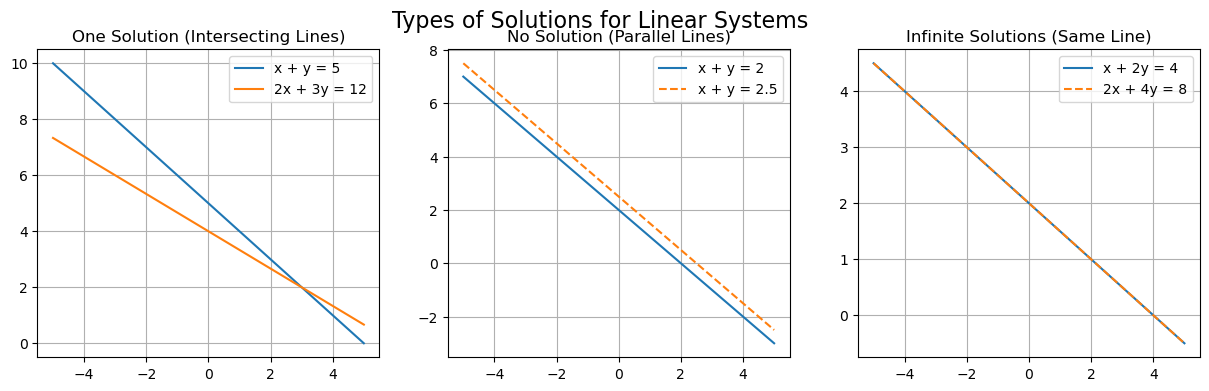

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = np.linspace(-5, 5, 100)

# --- Case 1: One solution (intersecting lines)
y1 = -x + 5       # Line 1: x + y = 5
y2 = -2/3 * x + 4 # Line 2: 2x + 3y = 12  -> y = -2/3x + 4

# --- Case 2: No solution (parallel lines)
y3 = -x + 2       # Line 1: x + y = 2
y4 = -x + 2.5     # Line 2: x + y = 2.5  -> parallel


# --- Case 3: Infinite solutions (same line)
y5 = -0.5 * x + 2 # Line 1: x + 2y = 4
y6 = -0.5 * x + 2 # Line 2: 2x + 4y = 8  -> same line

# --- Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
plt.suptitle("Types of Solutions for Linear Systems", fontsize=16)

# One solution
axes[0].plot(x, y1, label="x + y = 5")
axes[0].plot(x, y2, label="2x + 3y = 12")
axes[0].set_title("One Solution (Intersecting Lines)")
axes[0].legend()
axes[0].grid(True)

# No solution
axes[1].plot(x, y3, label="x + y = 2")
axes[1].plot(x, y4, label="x + y = 2.5", linestyle="--")
axes[1].set_title("No Solution (Parallel Lines)")
axes[1].legend()
axes[1].grid(True)

# Infinite solutions
axes[2].plot(x, y5, label="x + 2y = 4")
axes[2].plot(x, y6, label="2x + 4y = 8", linestyle="--")
axes[2].set_title("Infinite Solutions (Same Line)")
axes[2].legend()
axes[2].grid(True)

plt.show()


riables.  

---

ate****.


### Systematic Solution of Linear Systems (Row Reduction & Pivots)<a name='SystematicSolution'></a>
We now solve linear systems **systematically** using **row operations** instead of trial and error.  
This method produces an **equivalent system** in a simpler form — **row echelon** or **reduced row echelon form** — making it easy to find solutions.

#### Elementary Row Operations<a name='ElementaryRowOperations'>
For a system $( A\mathbf{x} = \mathbf{b} )$ (or augmented matrix $([A|b])$), we can:

1. Swap two rows: $ (R_i \leftrightarrow R_j)$  
2. Multiply a row by a nonzero scalar: $  ( kR_i \rightarrow Ri$)
3. Add a multiple of one row to another:  

These operations produce an **equivalent system** (same solution set).

---
#### Row Echelon Form (REF) <a name='REF'></a>
A matrix is in **row echelon form** if:

1. All **nonzero rows** are above rows of all zeros.  
2. The **leading coefficient** (first nonzero number from left, pivot) of a nonzero row is **to the right** of the pivot in the row above.  
3. Entries **below a pivot are zero**.

#### [Reduced Row Echelon Form (RREF)]<a name ='RREF'></a>
RREF has all the properties of REF plus:

1. Each pivot is **1**  
2. All entries **above and below** a pivot are **0**  

Once in RREF, the solution is **immediate**
#### [Pivot and Free Variables]<a name='Pivot'></a>
When solving a linear system using **row reduction**, variables fall into two categories:
##### Pivot

- A **pivot variable** corresponds to a **pivot column** in the **RREF** of the augmented matrix.  
- These variables are **dependent** — their values are determined by the system.  
- Each pivot column has a **leading 1** in RREF.

**Example:**
RREF:

$$
\begin{bmatrix}
1 & 0 & 3 & 5 \\
0 & 1 & -2 & 4 \\
0 & 0 & 0 & 0
\end{bmatrix}
$$

 Pivot columns: 1st and 2nd $x_1$ and $x_2$ are pivot variables.

##### Free Variables
- A **free variable** corresponds to a **non-pivot column**.  
- Its value can be chosen **arbitrarily** (parameter), and it generates **infinitely many solutions**.  
- The general solution is expressed as a **linear combination** of free variables
| Variable Type | Column Type in RREF | Meaning |
|---------------|-------------------|---------|
| Pivot | Leading 1 | Dependent, determined by the system |
| Free  | No pivot | Independent, can take arbitrary values → parameterize solutions |.


#### Solve the system systematically <a name='Solve'></a>
**Example**
$$
\begin{cases}
x + 2y - z = 1 \\
2x + 3y + z = 4 \\
-x + y + 2z = -3
\end{cases}
$$

**Step 1 — Augmented Matrix**
$
[A|b] =
\begin{bmatrix}
1 & 2 & -1 & 1 \\
2 & 3 & 1 & 4 \\
-1 & 1 & 2 & -3
\end{bmatrix}
$<br>
**Step 2 — Compute RREF (Row Reduction)**
pivot_cols tells which variables are pivot variables (dependent), and the rest are free variables<br>
**Step 3 _ Transform to REF or RREF**Identify pivots & free variables<br>
**Step 4 _ Back-substitute (if REF) or read solution (RREF)**


In [268]:
#Example
import numpy as np
from sympy import Matrix
#Augmented matrix
Ab = Matrix([
     [1, 2, -1, 1],
     [2, 3, 1, 4],
     [-1, 1, 2, -3]]
           )
#Compute RREF
Ab_rref, pivot_cols = Ab.rref()
print("RREF Matrix:\n", Ab_rref)
print("Pivot columns:", pivot_cols)


RREF Matrix:
 Matrix([[1, 0, 0, 3], [0, 1, 0, -4/5], [0, 0, 1, 2/5]])
Pivot columns: (0, 1, 2)


# Solution of Example
- pivot columns :1st, 2nd, 3rd columns
- $x_1,x_2,x_3$ are pivot variables
- No free variables in this system
- Since all variables are pivots → there is exactly one solution.<br>
**From the RREF, the system is already solved:**
$$x_1=3, \quad x_2=\frac{-4}{5}, \quad x_3=\frac{2}{5}$$
**the solution vector**:
$$ \mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3\\
\end{bmatrix}
= 
\begin{bmatrix}
3 \\
\frac{-4}{5} \\
\frac{2}{5}
\end{bmatrix}
$$

In [284]:
# Python Implementation

from sympy import Matrix
# Augmented matrix in RREF
RREF = Matrix([
    [1, 0, 0, 3],
    [0, 1, 0, -4/5],
    [0, 0, 1, 2/5]
])

# Solution is last column
solution = RREF[:, -1]
print("Solution vector x:")
print(solution)

Solution vector x:
Matrix([[3], [-0.800000000000000], [0.400000000000000]])
